In [7]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from proj1_helpers import *
from implementations import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [3]:
import datetime
DATA_TRAIN_PATH = 'C:/Users/saadc/Desktop/EPFL/ML/ML_course/projects/project1/scripts/data/train.csv' # TODO: download train data and supply path here 
labels, input_data, ids = load_csv_data(DATA_TRAIN_PATH)

In [4]:
# standardize the data : 
x, mean_x, std_x = standardize(input_data)
y, tx = build_model_data(x, labels)

In [5]:
y.shape, tx.shape


((250000,), (250000, 31))

## Do your thing crazy machine learning thing here :) ...

# Least squares GD :

In [8]:
# from gradient_descent import *
from plots import gradient_descent_visualization
from gradient_descent import gradient_descent

# Define the parameters of the algorithm.
max_iters = 100
gamma = 0.01
initial_w = np.zeros((31))

w,loss = least_squares_GD(y, tx, initial_w, max_iters, gamma)

print("weights: ",w)
print("loss: ",loss)


weights:  [-0.03381892  0.11391166 -0.03929939 -0.02139935 -0.00740797  0.00642086
  0.05901993  0.0056357  -0.01375136 -0.01815117 -0.02155208 -0.01414564
 -0.01322023  0.00626779 -0.00716966 -0.01366855 -0.01368106 -0.02047625
 -0.01366609 -0.01365018 -0.01812219 -0.01363899 -0.02746221 -0.01383892
  0.02178121  0.02054982  0.02054818  0.00238098  0.00622045  0.00621068
 -0.02123287]
loss:  0.4186061051583552


# Least squares SGD : 

In [9]:
from stochastic_gradient_descent import *
w,loss = least_squares_SGD(y, tx, initial_w, max_iters, gamma)
print("weights: ",w)
print("loss: ",loss)

weights:  [-0.03409145  0.12532842 -0.04218312 -0.0267449   0.0173271   0.03561215
  0.14155195  0.03403274 -0.0140913  -0.02765517 -0.00956274 -0.01448969
 -0.01300677  0.03523406 -0.00521846 -0.01360865 -0.01391551 -0.02424739
 -0.01316891 -0.01417998 -0.00632165 -0.01444593 -0.02258551 -0.01393304
  0.07781061  0.05617947  0.05684413  0.03307229  0.03493932  0.03498735
 -0.00764389]
loss:  0.35120520182926773


# Least squares Normal equations: 

In [10]:
w,loss = least_squares(y, tx)
print("weights: ",w)
print("loss: ",loss)

weights:  [-6.50837738e+02  3.13398434e-02 -3.09732207e+00 -2.70524979e+00
 -2.06814265e-01 -1.33792779e+00  1.94826080e-01 -1.03239658e+01
  1.48326944e+02 -4.76854731e-02 -8.00648402e+02 -9.37300487e+01
  4.14178761e+01  1.95969853e+01  8.04361958e+02 -1.14017107e-01
 -4.31615713e-01  8.06301529e+02 -1.53514846e-01  3.68155628e-01
  1.60070378e+00  9.47330280e-02 -2.16987098e-01 -9.17012631e+01
 -9.49514703e-02  8.74808962e-02  1.48713647e-01 -3.03346445e-02
 -2.85288993e+00 -5.12813578e+00  8.00322219e+02]
loss:  0.33944574670248323


# Ridge regression : 

In [11]:
lambda_ = 0.3
w,loss  = ridge_regression(y,tx,lambda_)
print("weights: ",w)
print("loss: ",loss)

weights:  [-0.48647632  0.11956947 -3.82726687 -0.66404646 -0.6744063   0.34916556
  0.28705026 -0.99589847  1.40560617  0.01896554  1.31258435 -0.87638103
  2.32022702  0.17479113  2.71253068 -0.18933859 -0.3227892   0.68812941
 -0.19858309 -0.03619472  2.01847621 -0.10812857 -0.22508119 -0.41528266
  0.57965844 -0.25896251 -0.25812042  0.6447507  -0.18387895 -0.27667878
 -2.48113776]
loss:  0.35534893641226006


# logistic regression : 

# Reg logistic regression : 


# 1. Split the data

In [12]:
ratio = 0.7
tx_tr, tx_te, y_tr, y_te = split_data(tx, y, ratio)

# 2. Handle outliers 

# 3 Accuracy of the models

In [13]:
weights, loss = least_squares(y_tr, tx_tr)
y_pred = predict_labels(weights, tx_te)
accu  = accuracy(y_pred,y_te)
print("accuracy:",accu)

accuracy: 0.7440533333333333


# 4. Confusion matrix 

Text(33.0, 0.5, 'expected')

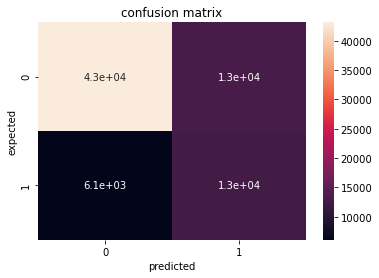

In [14]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
#confusion matrix
plt.figure(1)
cm=confusion_matrix(y_pred,y_te)
sn.heatmap(cm,annot=True)
plt.title("confusion matrix")
plt.xlabel("predicted")
plt.ylabel("expected")


## Generate predictions and save ouput in csv format for submission:

In [15]:
DATA_TEST_PATH = 'C:/Users/saadc/Desktop/EPFL/ML/ML_course/projects/project1/scripts/data/test.csv'  # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [16]:
weights = weights[1:31]
y_prediction = predict_labels(weights, tX_test)
y_prediction.shape

(568238, 1)

In [ ]:
OUTPUT_PATH = 'C:/Users/saadc/Desktop/EPFL/ML/ML_course/projects/project1/scripts/data/pred.csv' # TODO: fill in desired name of output file for submission
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)